#  `rev_porosity` 

Calculates the porosity of an image as a function subdomain size. This method works with extracting a specified number of subdomains of random size, then finding the porosity of those subdomains.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

No module named 'pyedt'


## `im`
The input binary image of the porous material with void space voxels labeled with 1(True) and solid phase labeled with 0(False).

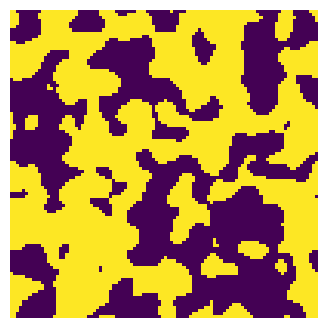

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[100, 100, 100])
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im[:, :, 6], origin='lower', interpolation='none')
ax.axis(False);

The `rev_porosity` returns a custom object containing the `volume` and `porosity` data. We can then plot the data to find the representative elementary volume (REV) of the porous material. REV can be found as the volume of a subdomain where any larger subdomain will have almost similar porosity values. In other words, in the following plot the point where the variation of porosity vs volume becomes a plateau.

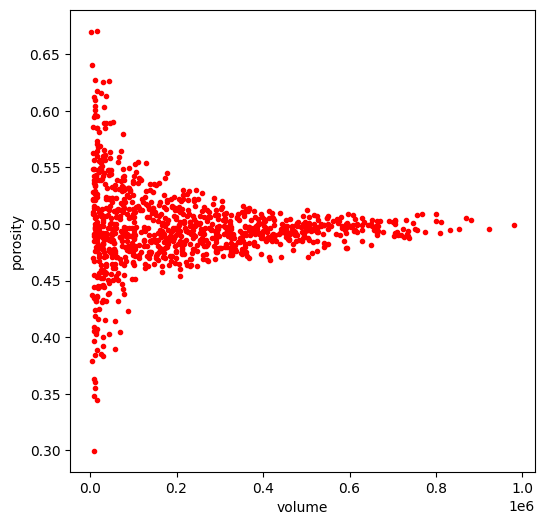

In [3]:
rev = ps.metrics.rev_porosity(im=im)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(rev.volume, rev.porosity, 'r.')
ax.set_xlabel("volume")
ax.set_ylabel("porosity");

## `n`

By default the method uses 1000 randomly located and sized boxes to sample as subdomains. Let's try a higher number to increase the number of samples:

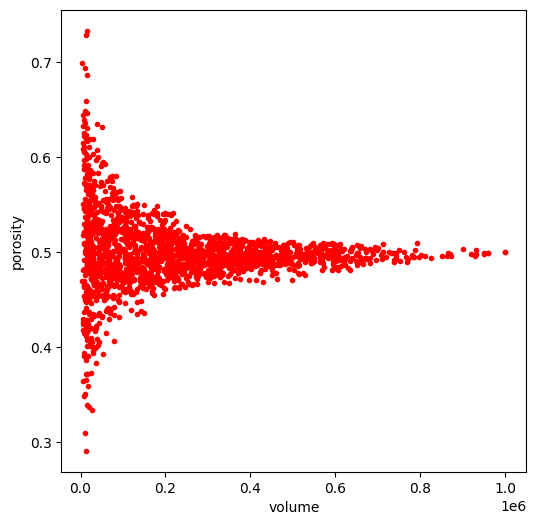

In [4]:
rev = ps.metrics.rev_porosity(im=im, n=2000)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(rev.volume, rev.porosity, 'r.')
ax.set_xlabel("volume")
ax.set_ylabel("porosity");

## slices

Instead of specifying `n` randomly located and sized boxes, you can also provided a list containing `slice` objects that define custom boxes.  There are some functions in `porespy.tools` for creating such lists, such as `get_slices_mulitgrid`:

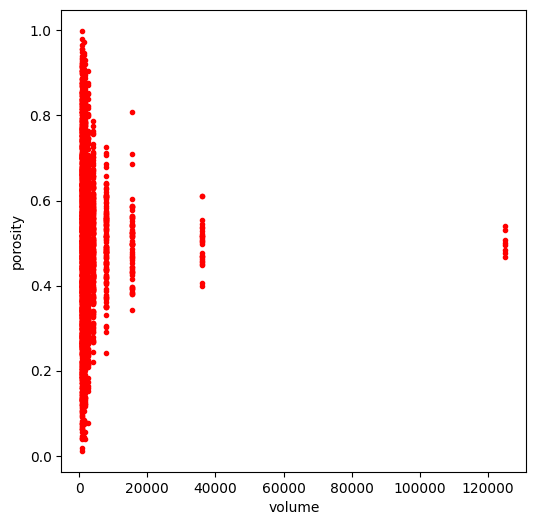

In [5]:
slices = ps.tools.get_slices_multigrid(
    im=im,
    block_size_range=[10, 50],
)
rev = ps.metrics.rev_porosity(im, slices=slices)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(rev.volume, rev.porosity, 'r.')
ax.set_xlabel("volume")
ax.set_ylabel("porosity");
